<a href="https://colab.research.google.com/github/Eswa2020/moringa_school_projects/blob/master/Copy_of_Esther_Wairimu_Kamau_Independent_project_week_2_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Business Understanding
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use commercial bank accounts.
Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## 1.1 understanding problem statement
*  The research problem is to figure out:how we can predict which individuals are most likely to have or use a bank account
*The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# 2.Data Understanding
After going through the DATA, the dataset focuses on a classification where you have to predict whether individuals are most likely to EITHER have or use a bank account in East Africa. 
Below are some of the factors which I think can affect the chance for a person to have a bank account:-
* People who have mobile phones have a lower chance to use bank accounts because of mobile money services.
* People who are employed have a higher chance of having bank accounts than people who are unemployed.
* People with high education levels have a high chance of having bank accounts.
* People in rural areas have a low chance to have bank accounts.
* Females have less chance to have bank accounts.
* Older  and young people have a low chance of having a bank account

##2.1Exploration data analysis definition

> Indented block


* First and foremost, EDA provides a stage for breaking down problem statements
into smaller experiments which can help understand the dataset
* EDA provides relevant insights which help analysts make key business decisions
* we will start by studying our data well

###2.2 Importing our libraries

In [1]:
#we start by  importing our libraries
#Importing Pandas
import pandas as pd

In [2]:
#Importing Numpy
import numpy as np

In [3]:
#Importing Seaborn
import seaborn as sns

In [4]:
#Importing Matplotlib
import matplotlib.pyplot as plt

###2.3 loading and defining(understanding)our datasets

In [5]:
#loading our datasets
#we can see the front end of the data
finance_definition=pd.read_csv('http://bit.ly/VariableDefinitions')
finance_definition.head(7)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee


we can see the various variables and their definitions from the upper side

In [6]:
#we see the rear end of the data too
finance_definition.tail()

,Variable Definitions,Unnamed: 1
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...
10,education_level,Highest level of education: No formal educatio...
11,job_type,Type of job interviewee has: Farming and Fishi...


and also from the rear side


In [37]:
finance_data = pd.read_csv('http://bit.ly/FinancialDataset')
finance_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


here we can see the heads of our dataset and top 5 of its top row's contents

In [8]:
finance_data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


and here we can see the rear

In [97]:
#we first get to know the number of entries in our dataset

print(finance_data.shape)

(23524, 13)


our dataset has 23524 rows and 13 columns

In [98]:
#Statistical description of the dataset
finance_data.describe()

,year,household_size,age
count,23524.000000,23524.000000,23524.000000
mean,2016.979000,3.677436,38.748215
std,0.899669,2.282110,16.573747
min,2016.000000,0.000000,0.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


Statistical description of the dataset comprsing of only the numerical  values

In [99]:

#from this we can see there some variables with missing/null data 'NaN' Values
finance_data.describe(include='all')

,country,year,uniqueid,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
count,23510,23524.000000,23524,23488,23509,23513,23524.000000,23524.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_302,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.677436,38.748215,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.282110,16.573747,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


we also get the statistical description of the categorical variables (non-numerical)

In [100]:
#to confirm the above 
finance_data.isnull().values.any()

True

# 3.Data Preparation

In [101]:
#to get all the null values positions and total number
#this helps us know if the null values are significant and if the are too many for us to drop 

finance_data.isnull().sum()

country                 14
year                     0
uniqueid                 0
bank_acc_status         36
location                15
Phone_acess             11
household_size           0
age                      0
gender_of_respondent    34
relation_wit_head        4
marital_status          32
Education_level         29
job_status              30
dtype: int64

we can conclude that they are not too many or too significant to drop but we can replace just incase

In [39]:
#we can replace the null values in the in the non-categorical data in our case the respondents age and household size
#this wont affect our data analysis
finance_data['household_size'].fillna(0, inplace=True)
finance_data['Respondent Age'].fillna(0, inplace=True)

to confirm the above is done

In [103]:
#to confirm the above we repeat the above code
finance_data.isnull().sum()

country                 14
year                     0
uniqueid                 0
bank_acc_status         36
location                15
Phone_acess             11
household_size           0
age                      0
gender_of_respondent    34
relation_wit_head        4
marital_status          32
Education_level         29
job_status              30
dtype: int64

In [104]:
#we can seee we have 8735 disticnt values in unique_id column
finance_data.nunique()

country                    4
year                       6
uniqueid                8735
bank_acc_status            2
location                   2
Phone_acess                2
household_size            21
age                       86
gender_of_respondent       2
relation_wit_head          6
marital_status             5
Education_level            7
job_status                10
dtype: int64

In [17]:
# we can also check for duplicated values
#we have no duplicated value
finance_data.duplicated().sum()


0

In [40]:
# Explanation:We can rename our columns to more reconginazible labels
#we will use the   function
#we can also rename our column names for easy accesssing
finance_data.rename(columns = {'Level of Educuation':'Education_level','Type of Job':'job_status','Respondent Age':'age','Has a Bank account':'bank_acc_status','Type of Location':'location','Cell Phone Access':'Phone_acess','The relathip with head':'relation_wit_head'},inplace = True)

the results after renaming our columns we get

In [11]:
finance_data.head()

,country,year,uniqueid,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


##3.1.Univariate analysis
The Data associated with each variable includes a long list of values (both numeric and Categorical), and having these values as a long series is not particularly useful yet they don’t provide any significant insight to our anlysis. In order to convert the raw data into information we can actually use, we need to summarize and then examine the variable’s distribution one by one.Thats where univariate analysis comes in. The univariate analysis for numerical and categorical attributes are different as We shall see.

In [112]:
#The following codes show unique values in the bank_account variable where' Yes' means the person
# has a bank account and 'No' means the person doesn't have a bank account.
finance_data['bank_acc_status'].value_counts()

No     20179
Yes     3309
Name: bank_acc_status, dtype: int64

the nos are the highest meaning that most of our respondents dont have bank accounts

For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot,
which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values.


Text(0, 0.5, 'owns bank a/c')

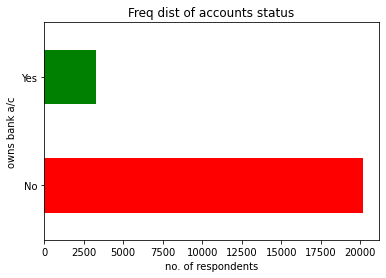

In [23]:
#In this case, we only have two statuses for bank account 'yes' and 'no'.The bar plot shows comparisons among these discrete categories,
#with the x-axis showing the specific categories and the y-axis the measured value.
#it clearly shows that a significant number of the respondents dont have bank accounts
finance_data['bank_acc_status'].value_counts().plot.barh(title='Freq dist of accounts status',color=['red','green']) 
# Add title and axis names
plt.xlabel('no. of respondents')
plt.ylabel('owns bank a/c')
#Similarly, by changing the column name in the code above, we can analyze every categorical column in our dataset


Text(0, 0.5, 'employment status')

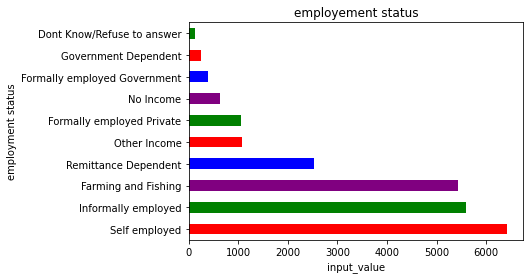

In [71]:
finance_data['job_status'].value_counts().plot.barh(title='employement status',color=['red','green','purple','blue']) 
# Add title and axis names
plt.xlabel('input_value')
plt.ylabel('employment status')
#most of our respondents are self-employed with very low number in  formal employment 

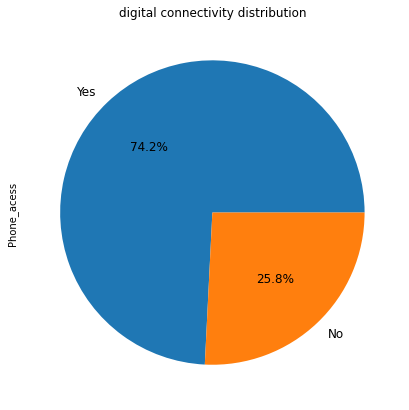

In [77]:
#then we can go aheadand  code for the pie chart as  seen below
connection_counts = finance_data['Phone_acess'].value_counts()
connection_Chart = connection_counts.plot(kind="pie",y='Count',autopct='%1.1f%%',title='digital connectivity distribution',fontsize=12,figsize=(7,7))
#most of our respondents are digitally connected and have access to phones making them highly bankable 

Text(0, 0.5, 'country')

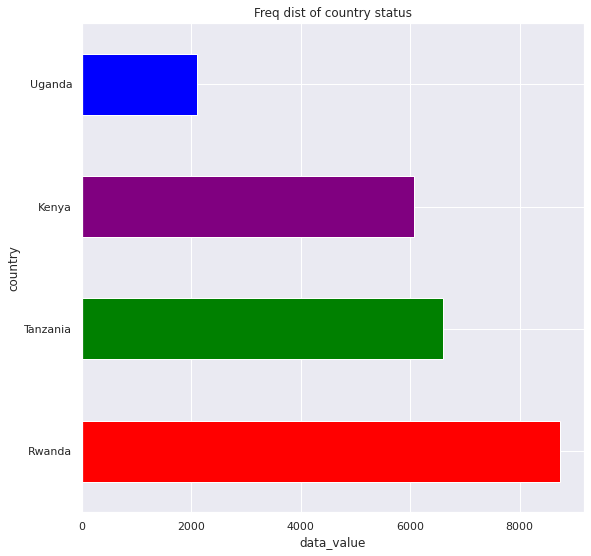

In [44]:
#we can go ahead and check in which country the respondents data was highest
#Using the graph, we can get the count or value count of the data used for all the countries. 
#We observe that most data was collected from rwanda and least from uganda.
finance_data['country'].value_counts().plot.barh(title='Freq dist of country status',color=['red','green','purple','blue']) 
# Add title and axis names
plt.xlabel('input_value')
plt.ylabel('country')

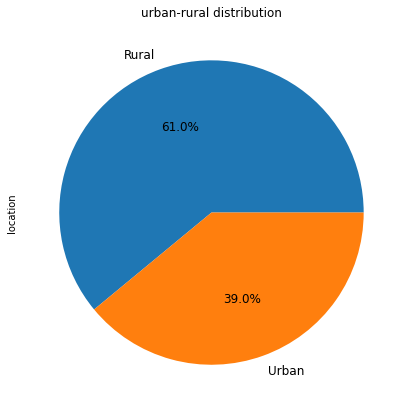

In [56]:
#we can go ahead and check in which location settings the respondents data was highest
#Using the pie_chart,A pie chart works best with two or three slices,
#we can get the count or value count of the location data .
#then we can go aheadand  code for the pie chart as  seen below
location_counts = finance_data['location'].value_counts()
location_Chart = location_counts.plot(kind="pie",y='Count',autopct='%1.1f%%',title='urban-rural distribution',fontsize=12,figsize=(7,7))



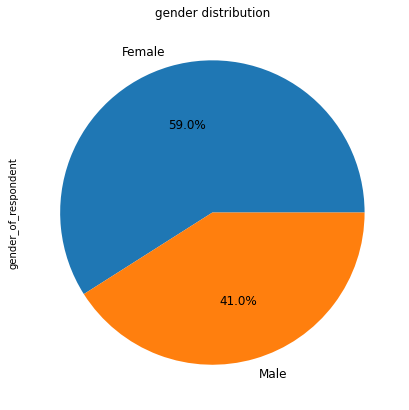

In [57]:
#most respondents to the dataset provided were females
gender_counts = finance_data['gender_of_respondent'].value_counts()
Gender_Chart = gender_counts.plot(kind="pie",y='Count',autopct='%1.1f%%',title='gender distribution',fontsize=12,figsize=(7,7))

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

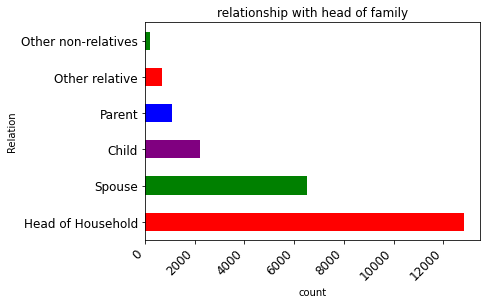

In [64]:
# Explore relationship_with_head of the household distribution 
finance_data['relation_wit_head'].value_counts().plot.barh(title='relationship with head of family',color=['red','green','purple','blue']) 
# Add title and axis names
plt.xlabel('count')
plt.ylabel('Relation')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')
plt.yticks(
    rotation=360, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')
#most of the respondents are the head of the households than relatives to the head

Text(0, 0.5, 'marital_status')

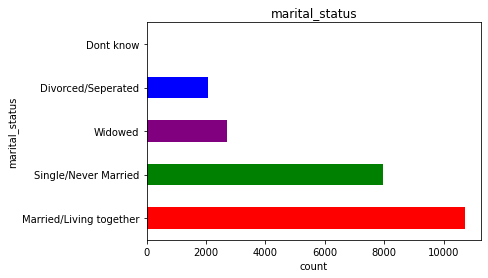

In [66]:
# Explore the marital status of our respondents  
finance_data['marital_status'].value_counts().plot.barh(title='marital_status',color=['red','green','purple','blue']) 
# Add title and axis names
plt.xlabel('count')
plt.ylabel('marital_status')
#most of the respondents are married or living with someone

Text(0, 0.5, 'educationlevel')

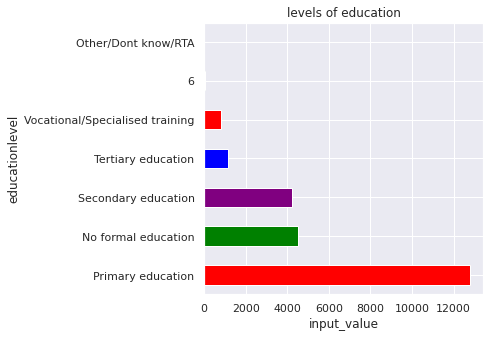

In [160]:
#since the data is from different years we can also demistify from which education level is the highest
finance_data['Education_level'].value_counts().plot.barh(title='levels of education',color=['red','green','purple','blue']) 
#Add title and axis names
plt.xlabel('input_value')
plt.ylabel('educationlevel')
#most of the respondents are not really educated ..with a big level having primary(basic)levels of education

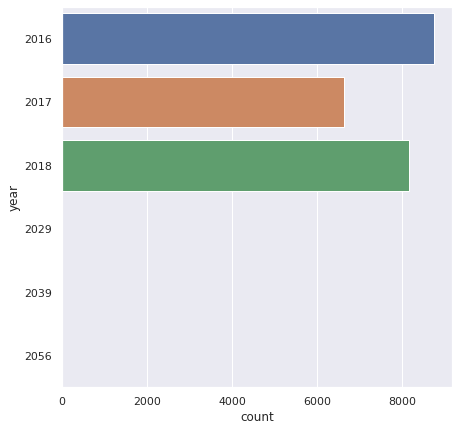

In [85]:
#we can go ahead and check in which year the responses are highest
#Using the graph, we can compare the range and distribution of the datasets for all the years. 
#We use the seaborn plotting in this one by using sns
#We observe that there is a greater variability in uganda area_mean but kenya have larger outliers.
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(y="year",data=finance_data,orient="h")


Text(0.5, 0, 'Household  size')

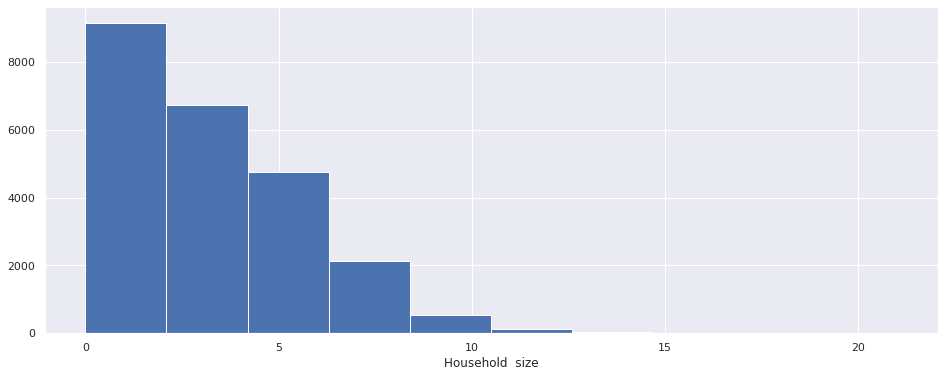

In [87]:
# Explore household_size distribution 

plt.figure(figsize=(16, 6))
finance_data.household_size.hist() 
plt.xlabel('Household  size')

Text(0.5, 0, 'age of respondent')

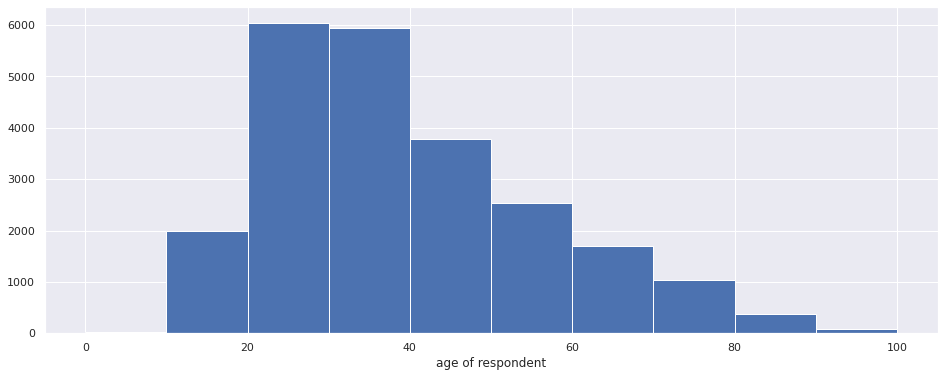

In [88]:
plt.figure(figsize=(16, 6))
finance_data.age.hist() 
plt.xlabel('age of respondent')

A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

In [ ]:
#since our target variable is the bank account status we have to compare it with the other variables
#unfortunately our target variable is not numerical SO we can start our analysis with the numerical datatypes
#since we are fortunate we do not have a large dataset we already know the numeriacals('year','age','household size')


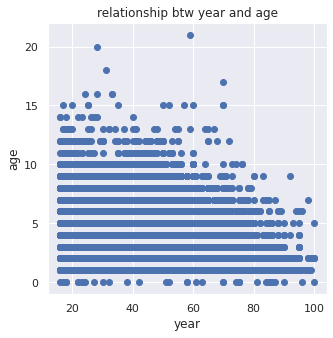

In [192]:
# Plot the first variables 'year' and 'age'
x1=finance_data.year
y1=finance_data.age
plt.scatter(x, y)
plt.title('relationship btw year and age')
plt.xlabel('year')
plt.ylabel('age')
plt.show()

In [145]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr1 = pearsonr(x1, y1)
print('Pearsons correlation': %.3f % corr1)

SyntaxError: ignored

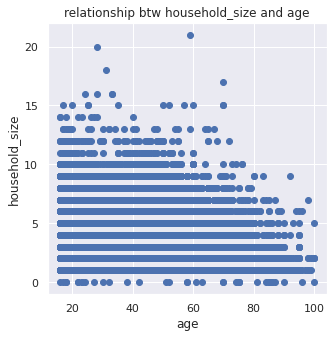

In [191]:

# Plot the first variables 'year' and 'age'
x=finance_data.age
y=finance_data.household_size
plt.scatter(x, y)
plt.title('relationship btw household_size and age')
plt.xlabel('age')
plt.ylabel('household_size')
plt.show()

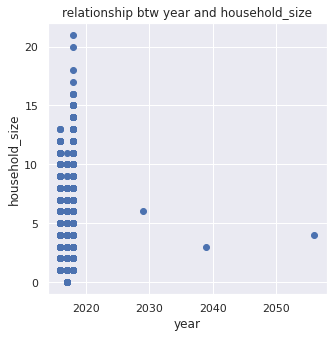

In [190]:
# Plot the first variables 'year' and 'age'
x=finance_data.year
y=finance_data.household_size
plt.scatter(x, y)
plt.title('relationship btw year and household_size')
plt.xlabel('year')
plt.ylabel('household_size')
plt.show()

##3.2 Bivariate Analysis
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of the relationship between two variables,
* whether there exists an association and the strength of this association,
* or whether there are differences between two variables and the significance of these differences.
After looking at every variable individually in Univariate analysis, we will now explore them again with respect to the target variable.(Bank account status)

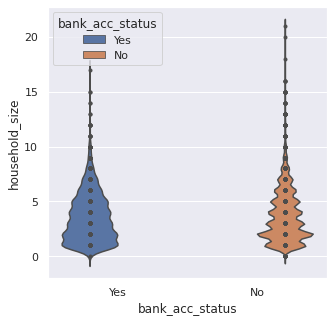

In [13]:
#we can learn about the respondents maturity by checking on age from each country
#This visualization allows us to see exactly how our data is distributed, and where it’s concentrated.
#We can see for  that the country with a high significant response rate is tanzania with the lowest being uganda
#This chart’s idea is to display the spread of the values, but instead of boxes and summaries, it shows the distribution shape.
#from this we can see that most respondents ages are above 20 and below 60 years
#This doesn’t allow us to make a conclusion, 
#but it does a great job guiding our research to what needs to be further investigated.
sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(x=finance_data['bank_acc_status'],y=finance_data['household_size'],split=False,inner='points',hue='bank_acc_status',data=finance_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

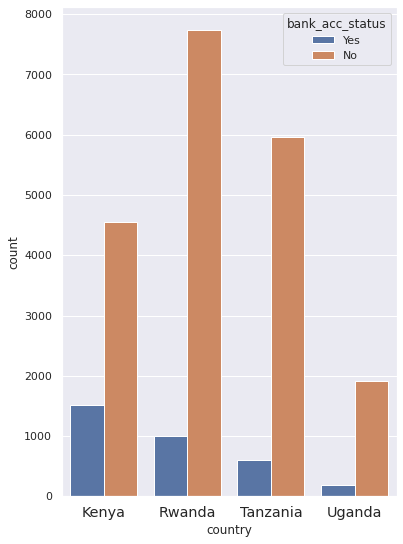

In [186]:
#Explore household_size vs bank account 
plt.figure(figsize=(6, 9))
sns.countplot('country', hue='bank_acc_status', data=finance_data)
plt.xticks(
   fontweight='light',
    fontsize='large')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

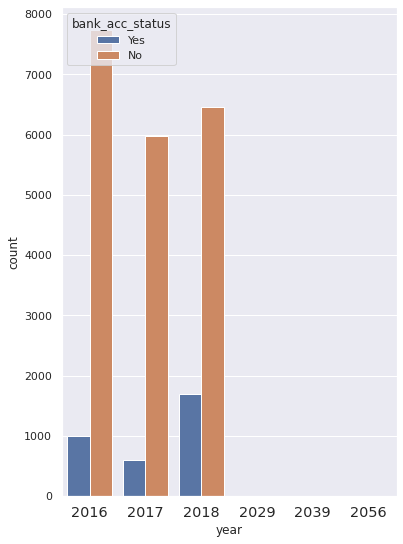

In [187]:
#Explore household_size vs bank account 
plt.figure(figsize=(6, 9))
sns.countplot('year', hue='bank_acc_status', data=finance_data)
plt.xticks(
   fontweight='light',
    fontsize='large')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

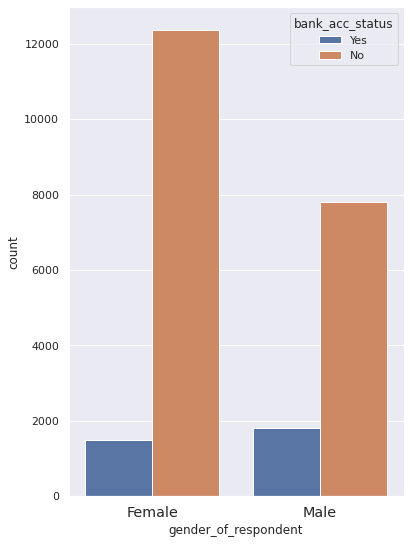

In [152]:
#Explore household_size vs bank account 
plt.figure(figsize=(6, 9))
sns.countplot('gender_of_respondent', hue='bank_acc_status', data=finance_data)
plt.xticks(
   fontweight='light',
    fontsize='large')

more males own bank accounts than females.With the females having the highest 'no bank account'status

In [48]:
#had to to the hot-encoding to the phone acess column and change to numerical to get the "r"
x=finance_data.gender_of_respondent
y=finance_data.bank_acc_status
x.corr(y)                    
y.corr(x)

0.11288681520731962

In [49]:
# Spearman's rho
x.corr(y, method='spearman')

0.11520952414154587

In [50]:
# Spearman's rho
x.corr(y, method='kendall')

0.1150394545256976

In [ ]:
#still have a very weak positive relationship nearer 0 than 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

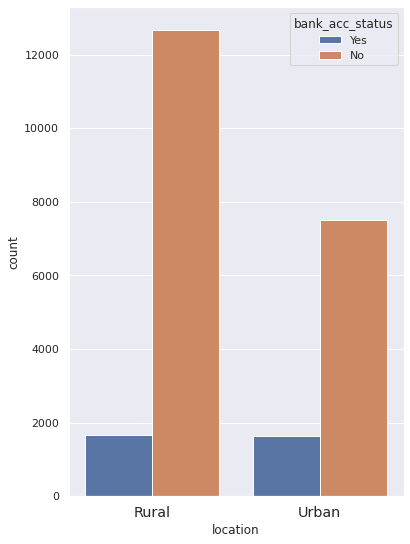

In [151]:
#Explore household_size vs bank account 
plt.figure(figsize=(6, 9))
sns.countplot('location', hue='bank_acc_status', data=finance_data)
plt.xticks(
   fontweight='light',
    fontsize='large')

most respondents own bank accounts that their rural counterparts

In [45]:
#had to to the hot-encoding to the phone acess column and change to numerical to get the "r"
x=finance_data.location
y=finance_data.bank_acc_status
x.corr(y)                    
y.corr(x)

0.09407752606953194

In [46]:
# Spearman's rho
x.corr(y, method='spearman')

0.09061056775812218

In [47]:
# Spearman's rho
x.corr(y, method='kendall')

0.09054299872474661

In [ ]:
#they have a very weak positive realtionship(corelation) its very near 0 than 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

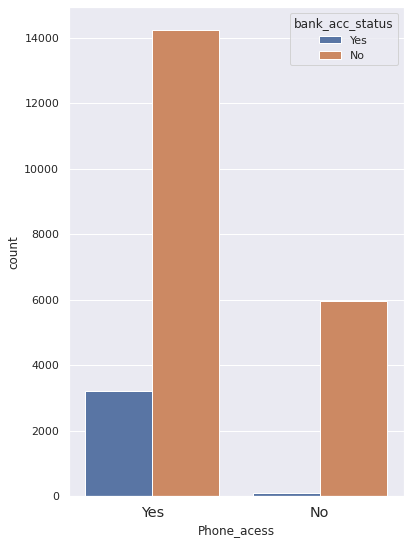

In [157]:
#Explore phone_acess vs bank account 
plt.figure(figsize=(6, 9))
sns.countplot('Phone_acess', hue='bank_acc_status', data=finance_data)
plt.xticks(
   fontweight='light',
    fontsize='large')

owning a phone does not necessarily mean having an a bank account as out data suggests

In [42]:
#had to to the hot-encoding to the phone acess column and change to numerical to get the "r"
x=finance_data.Phone_acess
y=finance_data.bank_acc_status
x.corr(y)                    
y.corr(x)


0.2075796328293174

In [43]:
# Spearman's rho
x.corr(y, method='spearman')

0.20885263168152748

In [44]:
# Spearman's rho
x.corr(y, method='kendall')

0.2087166531999663

In [ ]:
#they have a weak positive relationship(co-relation)its nearer 0 than 1.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

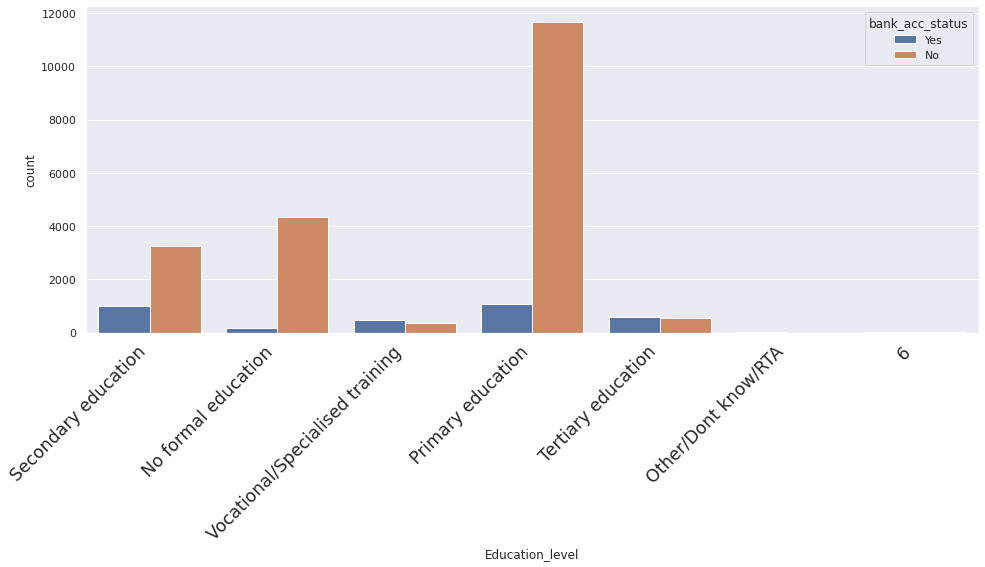

In [161]:
plt.figure(figsize=(16, 6))
sns.countplot('Education_level', hue= 'bank_acc_status', data=finance_data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

people with abit or some education level are the ones who owns bank accounts

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

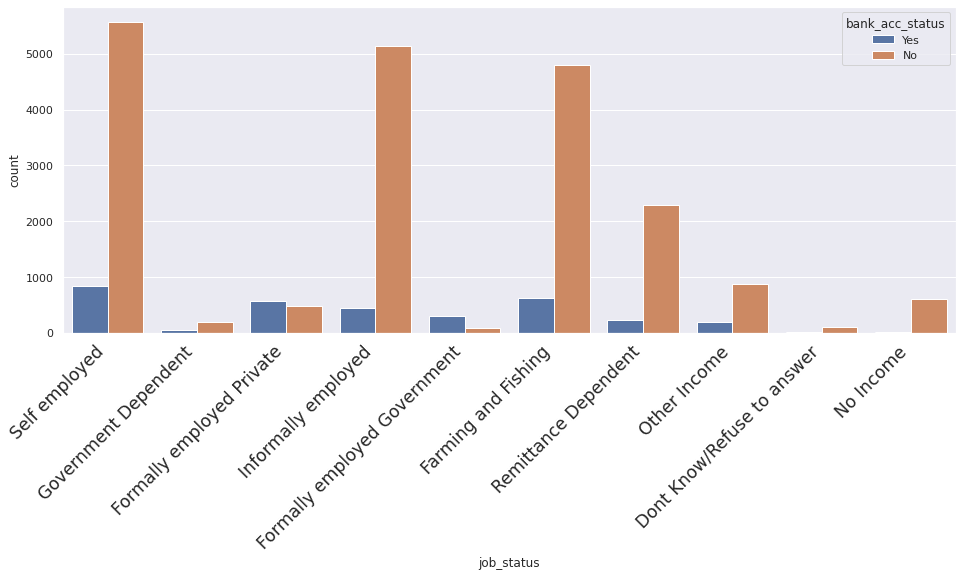

In [162]:
plt.figure(figsize=(16, 6))
sns.countplot('job_status', hue= 'bank_acc_status', data=finance_data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

most business(self-employed )persons own bank accounts still they are the ones who realtively dont own any account

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

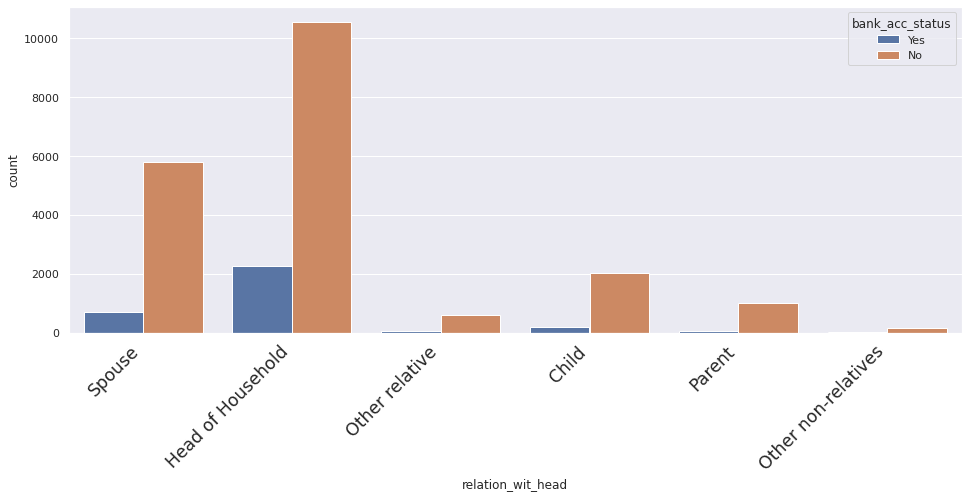

In [164]:
plt.figure(figsize=(16, 6))
sns.countplot('relation_wit_head', hue= 'bank_acc_status', data=finance_data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

people who are head of the households are mainly the ones who own bank accounts

In [ ]:
#we can also get the relationship between the numeric and categorical by changing the bank status from categorical to numerical
#and since its nominal this makes our work easy
#This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
#The two most popular techniques are an Ordinal Encoding and a One-Hot Encoding.

In [41]:
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
finance_data['bank_acc_status']=number.fit_transform(finance_data['bank_acc_status'].astype('str'))
finance_data['gender_of_respondent']=number.fit_transform(finance_data['gender_of_respondent'].astype('str'))
finance_data['Phone_acess']=number.fit_transform(finance_data['Phone_acess'].astype('str'))
finance_data['location']=number.fit_transform(finance_data['location'].astype('str'))

finance_data.head()

,country,year,uniqueid,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
0,Kenya,2018,uniqueid_1,1,0,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text major ticklabel objects>)

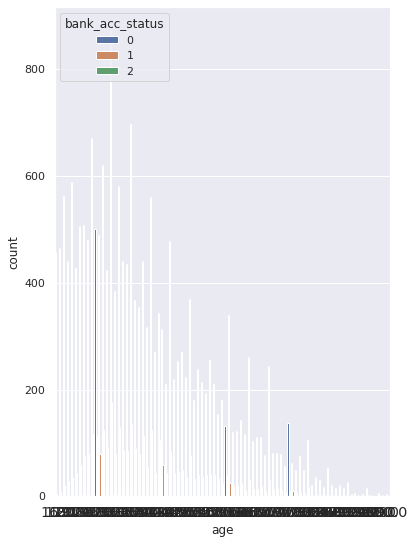

In [189]:
#Explore household_size vs bank account 
plt.figure(figsize=(6, 9))
sns.countplot('age', hue='bank_acc_status', data=finance_data)
plt.xticks(
   fontweight='light',
    fontsize='large')

cannot be presnted in a box plot unless we bin the ages

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

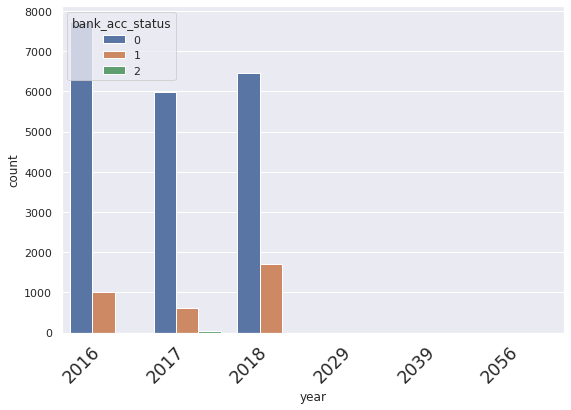

In [178]:
plt.figure(figsize=(9, 6))
sns.countplot('year', hue= 'bank_acc_status', data=finance_data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

even as more technological advancements increase within the years this does not sway our resondents to own bank accounts

In [37]:
x=finance_data.year
y=finance_data.bank_acc_status
x.corr(y)                    
y.corr(x)

0.10750259121399523

In [39]:
# Spearman's rho
x.corr(y, method='spearman')

0.11096192346431072

In [40]:
# Kendall's tau
x.corr(y, method='kendall')

0.10453119018531276

In [ ]:
#bank account status and year of our datasets have a weak positive correlation are nearer 0 than 1

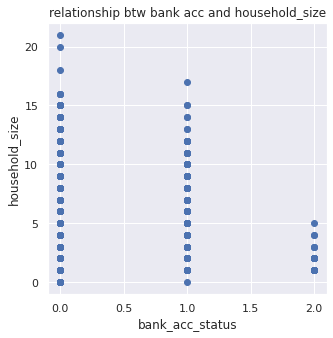

In [33]:
# Plot the first variables 'bank_acc_status' and 'household_size'
x=finance_data.bank_acc_status
y=finance_data.household_size
plt.scatter(x, y)
plt.title('relationship btw bank acc and household_size')
plt.xlabel('bank_acc_status')
plt.ylabel('household_size')
plt.show()

In [34]:
x=finance_data.year
y=finance_data.household_size
x.corr(y)                    
y.corr(x)

-0.04934365032853074

In [35]:
# Spearman's rho
x.corr(y, method='spearman')

-0.1022174695037808

In [36]:
# Kendall's tau
x.corr(y, method='kendall')

-0.08987299385193023

In [ ]:
#they have a strong negative relationship..not correlated at all

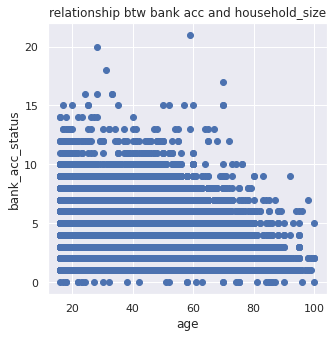

In [28]:
# Plot the first variables 'year' and 'age'
x=finance_data.age
y=finance_data.household_size
plt.scatter(x, y)
plt.title('relationship btw bank acc and age of the respondent')
plt.xlabel('age')
plt.ylabel('bank_acc_status')
plt.show()

In [29]:
# Pearson's r
x=finance_data['bank_acc_status']
y=finance_data['age']
x.corr(y)                    
y.corr(x)

0.017214854872023247

In [30]:
# Spearman's rho
x.corr(y, method='spearman')  

0.044141544006255674

In [31]:
# Kendall's tau
x.corr(y, method='kendall')

0.03636433027524043

In [ ]:
# have a very weak positive realtionship since its nearer to zero than it is to one

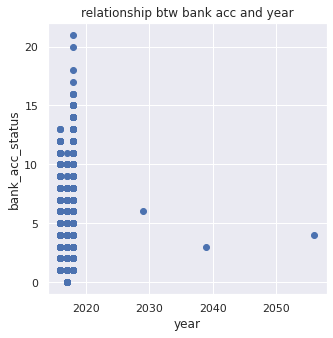

In [24]:
# Plot the our variables 'year' and 'house_holdsize'
x=finance_data.year
y=finance_data.household_size
plt.scatter(x, y)
plt.title('relationship btw bank acc and year')
plt.xlabel('year')
plt.ylabel('bank_acc_status')
plt.show()

calculate all three correlation coefficients(correlation btw bank account status and years of our datasets)

In [25]:
# Pearson's r
x=finance_data['bank_acc_status']
y=finance_data['year']
x.corr(y)                    
y.corr(x)

0.10750259121399522

In [26]:
# Spearman's rho
x.corr(y, method='spearman')  


0.11096192346431072

In [27]:
# Kendall's tau
x.corr(y, method='kendall')  


0.10453119018531275

In [ ]:
#they have a weak positive correlation according to the results above

##3.3 Multi-Variate Analysis
This is a statistical analysis that involves observation and analysis of more than one statistical outcome variable at a time.Since in our bi-variate analysis most of hypotheses were denied since almost all relationship btw bank account status and the variables had weak positive relationships or negative relationship

Below are some of the factors which I think can affect the chance for a person to have a bank account:-
* People who have mobile phones have a lower chance to use bank accounts because of mobile money services.(weak)
* People who are employed have a higher chance of having bank accounts than people who are unemployed.(yet to analyse)
* People with high education levels have a high chance of having bank accounts.(yet to analyse)
* People in rural areas have a low chance to have bank accounts.(weak)
* Females have less chance to have bank accounts.(weak)
* Older  and young people have a low chance of having a bank account(yet to analyse)

In [42]:
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
finance_data['relation_wit_head']=number.fit_transform(finance_data['relation_wit_head'].astype('str'))
finance_data['marital_status']=number.fit_transform(finance_data['marital_status'].astype('str'))
finance_data['Education_level']=number.fit_transform(finance_data['Education_level'].astype('str'))
finance_data['job_status']=number.fit_transform(finance_data['job_status'].astype('str'))



In [ ]:
finance_data.drop(['country', 'year'], axis='columns', inplace=True)

In [46]:
finance_data.head()

,uniqueid,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
0,uniqueid_1,1,0,1,3.0,24.0,0,5,2,4,9
1,uniqueid_2,0,0,0,5.0,70.0,0,1,4,1,4
2,uniqueid_3,1,1,1,5.0,26.0,1,3,3,6,9
3,uniqueid_4,0,0,1,5.0,34.0,0,1,2,3,3
4,uniqueid_5,0,1,0,8.0,26.0,1,0,3,3,5


In [47]:
import seaborn as sb

In [48]:
pearsoncorr = finance_data.corr(method='pearson')
pearsoncorr

,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
bank_acc_status,1.000000,0.094078,0.207580,-0.027453,0.015956,0.112887,-0.067332,-0.036319,0.311264,-0.057904
location,0.094078,1.000000,-0.079791,-0.275247,-0.047421,0.015160,0.017948,0.081240,0.123569,0.367510
Phone_acess,0.207580,-0.079791,1.000000,0.097705,-0.103167,0.099060,-0.048446,-0.093619,0.251169,-0.144151
household_size,-0.027453,-0.275247,0.097705,1.000000,-0.117447,0.006830,0.087380,-0.112310,-0.007598,-0.181904
age,0.015956,-0.047421,-0.103167,-0.117447,1.000000,0.011090,-0.151419,0.219691,-0.349195,-0.102268
gender_of_respondent,0.112887,0.015160,0.099060,0.006830,0.011090,1.000000,-0.467420,-0.099123,0.118218,-0.028291
relation_wit_head,-0.067332,0.017948,-0.048446,0.087380,-0.151419,-0.467420,1.000000,-0.141008,-0.017390,0.041329
marital_status,-0.036319,0.081240,-0.093619,-0.112310,0.219691,-0.099123,-0.141008,1.000000,-0.121217,0.056849
Education_level,0.311264,0.123569,0.251169,-0.007598,-0.349195,0.118218,-0.017390,-0.121217,1.000000,0.048925
job_status,-0.057904,0.367510,-0.144151,-0.181904,-0.102268,-0.028291,0.041329,0.056849,0.048925,1.000000


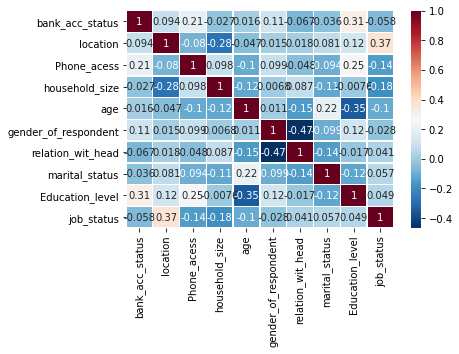

In [66]:

sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr,
            yticklabels=pearsoncorr,
            cmap='RdBu_r',
            annot=True,
            fmt='0.2g',
            linewidths=0.4,
           square=False)

In [59]:
corr_kendall = finance_data.corr(method='kendall')
corr_kendall

,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
bank_acc_status,1.000000,0.090543,0.208717,-0.021038,0.035975,0.115039,-0.047323,-0.054757,0.296074,-0.045666
location,0.090543,1.000000,-0.082253,-0.260164,-0.039845,0.014367,0.029483,0.134897,0.114921,0.332448
Phone_acess,0.208717,-0.082253,1.000000,0.104183,-0.040727,0.100104,-0.038431,-0.121553,0.234396,-0.119901
household_size,-0.021038,-0.260164,0.104183,1.000000,-0.063567,0.003107,0.045292,-0.194417,0.012413,-0.175671
age,0.035975,-0.039845,-0.040727,-0.063567,1.000000,0.017619,-0.028082,0.076740,-0.267633,-0.074413
gender_of_respondent,0.115039,0.014367,0.100104,0.003107,0.017619,1.000000,-0.404965,-0.095970,0.110884,-0.017861
relation_wit_head,-0.047323,0.029483,-0.038431,0.045292,-0.028082,-0.404965,1.000000,-0.185894,-0.057176,0.040431
marital_status,-0.054757,0.134897,-0.121553,-0.194417,0.076740,-0.095970,-0.185894,1.000000,-0.079962,0.098206
Education_level,0.296074,0.114921,0.234396,0.012413,-0.267633,0.110884,-0.057176,-0.079962,1.000000,0.035670
job_status,-0.045666,0.332448,-0.119901,-0.175671,-0.074413,-0.017861,0.040431,0.098206,0.035670,1.000000


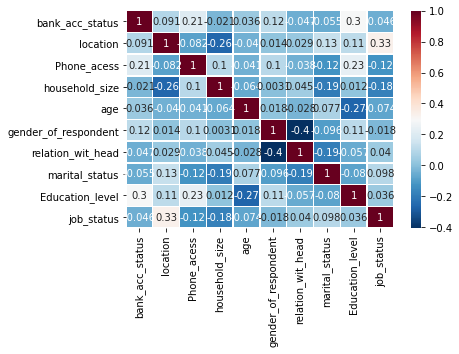

In [64]:
sns.heatmap(corr_kendall, 
            xticklabels=pearsoncorr,
            yticklabels=pearsoncorr,
            cmap='RdBu_r',
            annot=True,
            fmt='0.2g',
            linewidths=0.4,
           square=False)

In [68]:
corr_l = finance_data.corr(method='spearman')
corr_l

,bank_acc_status,location,Phone_acess,household_size,age,gender_of_respondent,relation_wit_head,marital_status,Education_level,job_status
bank_acc_status,1.000000,0.090611,0.208853,-0.024163,0.043668,0.115210,-0.050343,-0.058504,0.317410,-0.051278
location,0.090611,1.000000,-0.082258,-0.298608,-0.048323,0.014382,0.031330,0.143988,0.123150,0.372988
Phone_acess,0.208853,-0.082258,1.000000,0.119579,-0.049368,0.100199,-0.040849,-0.129749,0.251168,-0.134514
household_size,-0.024163,-0.298608,0.119579,1.000000,-0.091701,0.003547,0.052112,-0.236830,0.014970,-0.226959
age,0.043668,-0.048323,-0.049368,-0.091701,1.000000,0.021365,-0.033671,0.109963,-0.344301,-0.098685
gender_of_respondent,0.115210,0.014382,0.100199,0.003547,0.021365,1.000000,-0.430569,-0.102510,0.118859,-0.020031
relation_wit_head,-0.050343,0.031330,-0.040849,0.052112,-0.033671,-0.430569,1.000000,-0.218795,-0.065592,0.047941
marital_status,-0.058504,0.143988,-0.129749,-0.236830,0.109963,-0.102510,-0.218795,1.000000,-0.091933,0.118688
Education_level,0.317410,0.123150,0.251168,0.014970,-0.344301,0.118859,-0.065592,-0.091933,1.000000,0.043513
job_status,-0.051278,0.372988,-0.134514,-0.226959,-0.098685,-0.020031,0.047941,0.118688,0.043513,1.000000


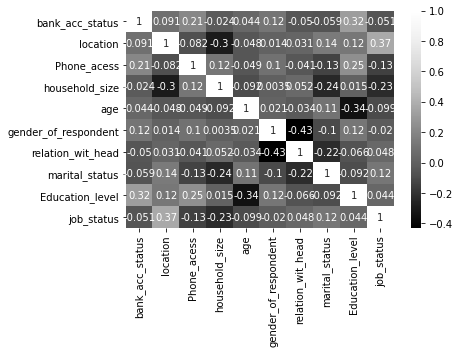

In [72]:
sns.heatmap(corr_l,xticklabels=pearsoncorr,
            yticklabels=pearsoncorr, annot = True,
            cmap='Greys_r',  
             )

In [ ]:
#bank acccount status is closely positively co-related with all the three tests 
# with location(whether one is urban or rural setting)
#it's also has a weak positive corelation with one having a access to the phone,
#which we had already seen in our bivarite and univariate analysis
#also level of education affects one having owning a bank account although in a very weak corelation

# 4.Evaluation

Above you can see the correlation network of all the variables selected, correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1.

In this dataset, we see that 
* bank acccount status is closely positively co-related with all the three tests  with location(whether one is urban or rural setting)
* it's also has a weak positive corelation with one having a access to the phone,which we had already seen in our bivarite and univariate analysis
* also level of education affects one having owning a bank account although in a very weak corelation
* the factors that affect an individual from owning a bank account in east africa using our dataset is mainly the location(urban-rural) they live and partially their level of education followed by their digital connectivity
* univariate and bivariate anlaysis helped immensely in creating a profile of factors that helped us know them.It made our analysis easier and our data less messy.


# 5.Recommendations
I would recommend doing another research where the respondents come mainly from the urban area and are more educated.Would also recommend to get equal data from the four countries and from same years to get more accurate results.

#6.Challenging the solution
Performing a different multivaraite analysis with the varaibles completely broken down e.g. years into 2016,2017,2018,.etc